# EDA

## Intial Setup and Analysis

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\muham\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [3]:
import pandas as pd

books=pd.read_csv(f'{path}\\books.csv')
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


## Handling Missing Values

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [5]:
books.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [6]:
df = pd.DataFrame( {"Column": books.columns,
        "Total Values": books.count(),
        "Uniques Values": books.nunique(),
        "Null Values": books.isna().sum(),
        "Rows Duplicates":books.duplicated().sum()})
df

,Column,Total Values,Uniques Values,Null Values,Rows Duplicates
isbn13,isbn13,6810,6810,0,0
isbn10,isbn10,6810,6810,0,0
title,title,6810,6398,0,0
subtitle,subtitle,2381,2009,4429,0
authors,authors,6738,3780,72,0
categories,categories,6711,567,99,0
thumbnail,thumbnail,6481,6481,329,0
description,description,6548,6474,262,0
published_year,published_year,6804,94,6,0
average_rating,average_rating,6767,200,43,0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Relation between Missing Values')

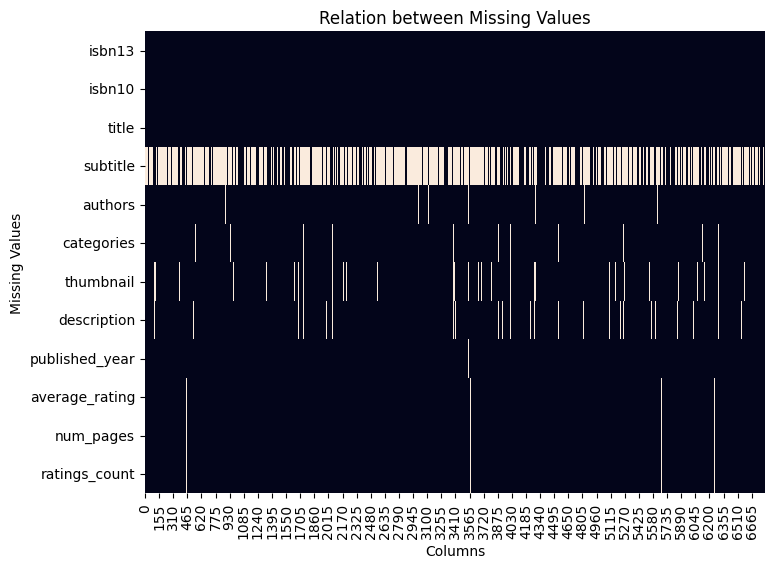

In [8]:
plt.figure(figsize=(8,6))
ax=plt.axes()
sns.heatmap(books.isna().T,cbar=False,ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.title('Relation between Missing Values')

In [9]:
import numpy as np

## Feature manipulation

#### Description is the main variable for analysis so will be dig deep to check whether it has any relationship with our missing values 

In [10]:
books['missing_description']=np.where(books['description'].isna(),1,0)
books['book_age']=2025-books["published_year"]

Text(0.5, 1.0, 'Correlation between Missing Values ')

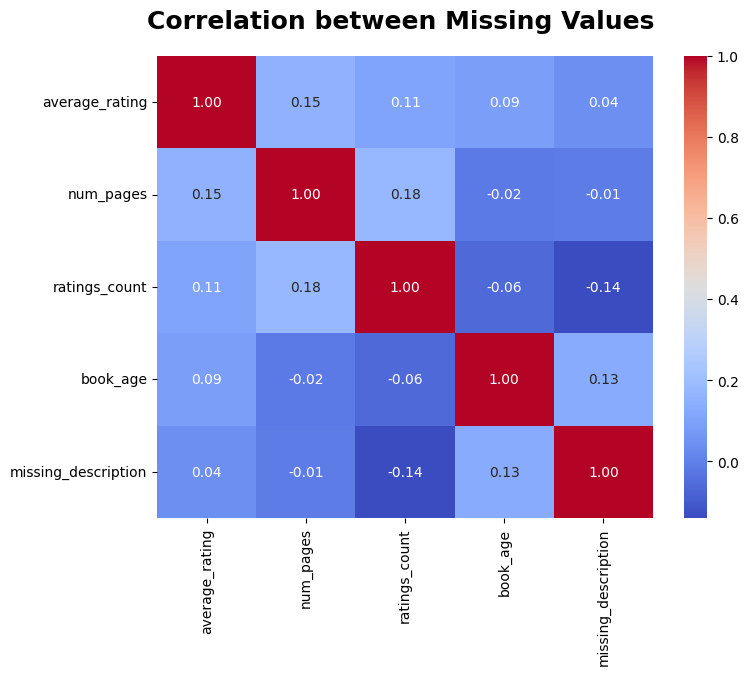

In [11]:
columns_of_interest = [
    "average_rating",
    "num_pages",
    "ratings_count",
    "book_age",
    "missing_description",]

plt.figure(figsize=(8,6))
ax=plt.axes()
ax=sns.heatmap(books[columns_of_interest].corr("spearman"),
            annot=True,
            fmt='.2f',
            ax=ax,
            cmap="coolwarm"
            )

ax.set_title('Correlation between Missing Values ',fontdict={'size':18,'weight':"bold"},pad=20)


In [12]:
np.where(books['description'].isna() |
         books["average_rating"].isna() |
         books["num_pages"].isna() |
         books["ratings_count"].isna(),1,0).sum()

299

In [13]:
299/6810*100

4.390602055800294

In [14]:
np.where(
    books["description"].isna()
    | books["average_rating"].isna()
    | books["num_pages"].isna()
    | books["ratings_count"].isna(),
    1,
    0,
)

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
books2 = books[
    ~(books["description"].isna())
    & ~(books["average_rating"].isna())
    &~ (books["num_pages"].isna())
    & ~(books["ratings_count"].isna())]

In [16]:
books2.shape

(6511, 14)

In [17]:
df = pd.DataFrame(
    {
        "Column": books2.columns,
        "Total Values": books2.count(),
        "Uniques Values": books2.nunique(),
        "Null Values": books2.isna().sum(),
        "Rows Duplicates": books2.duplicated().sum(),
    }
)
df

,Column,Total Values,Uniques Values,Null Values,Rows Duplicates
isbn13,isbn13,6511,6511,0,0
isbn10,isbn10,6511,6511,0,0
title,title,6511,6137,0,0
subtitle,subtitle,2282,1916,4229,0
authors,authors,6446,3630,65,0
categories,categories,6477,531,34,0
thumbnail,thumbnail,6293,6293,218,0
description,description,6511,6438,0,0
published_year,published_year,6507,89,4,0
average_rating,average_rating,6511,198,0,0


#### Analysis of "categories" for prediction in recommendation system

In [18]:
books2['categories'].value_counts().sort_values(ascending=False)

categories
Fiction                      2523
Juvenile Fiction              534
Biography & Autobiography     391
History                       258
Literary Criticism            164
                             ... 
Humorous stories                1
Butlers                         1
Gardens                         1
Assassins                       1
Indic fiction (English)         1
Name: count, Length: 531, dtype: int64

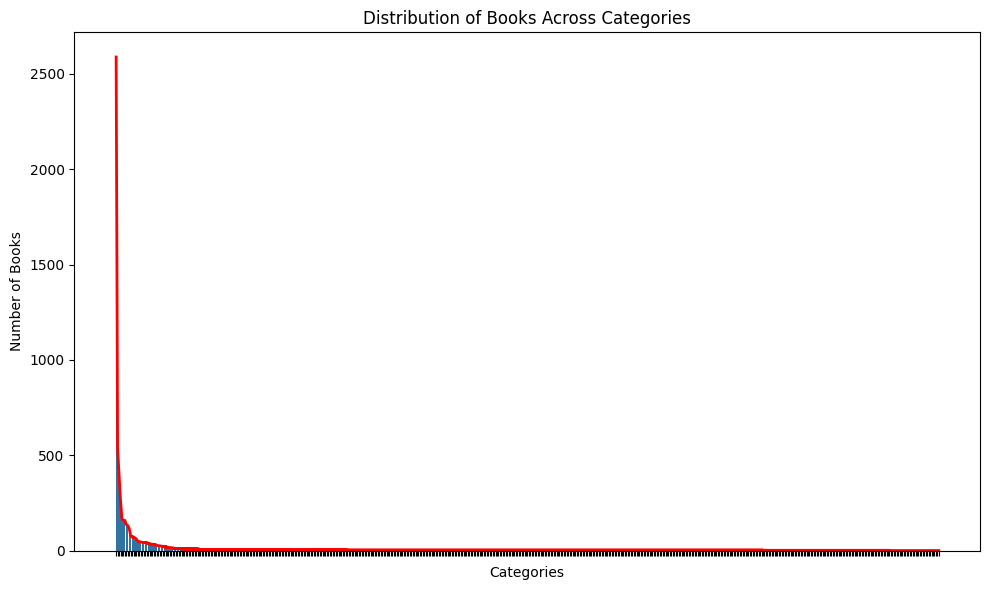

In [19]:
plt.figure(figsize=(10, 6))  # Add figure size
ax = plt.axes()
category_counts = books2["categories"].value_counts().sort_values(ascending=False)
sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
ax.plot(books["categories"].value_counts().sort_values(ascending=False),linewidth=2,color="red", linestyle="-")
ax.set_title("Distribution of Books Across Categories")
ax.set_ylabel("Number of Books")
ax.set_xlabel("Categories")
ax.set_xticklabels([])
plt.tight_layout()

In [20]:
c_counts=(books2["categories"].value_counts())
for i in range(0,15):
    print(
        f"No. of categories with {i} books are {(c_counts == i).sum()}"
    )

No. of categories with 0 books are 0
No. of categories with 1 books are 371
No. of categories with 2 books are 51
No. of categories with 3 books are 24
No. of categories with 4 books are 13
No. of categories with 5 books are 6
No. of categories with 6 books are 7
No. of categories with 7 books are 7
No. of categories with 8 books are 5
No. of categories with 9 books are 1
No. of categories with 10 books are 1
No. of categories with 11 books are 3
No. of categories with 12 books are 2
No. of categories with 13 books are 0
No. of categories with 14 books are 1


### Analysis of "description" for prediction in recommendation system

In [21]:
books2.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


In [22]:
pd.set_option("display.width", 30)
pd.set_option('display.max_colwidth', 40)

In [23]:
books2.description.head()

0    A NOVEL THAT READERS and critics hav...
1    A new 'Christie for Christmas' -- a ...
2    Volume Two of Stephen Donaldson's ac...
3    A memorable, mesmerizing heroine Jen...
4    Lewis' work on the nature of love di...
Name: description, dtype: object

In [24]:
books2.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/conten...,A NOVEL THAT READERS and critics hav...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/conten...,A new 'Christie for Christmas' -- a ...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/conten...,Volume Two of Stephen Donaldson's ac...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/conten...,"A memorable, mesmerizing heroine Jen...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/conten...,Lewis' work on the nature of love di...,2002.0,4.15,170.0,33684.0,0,23.0


In [25]:
books2.drop(columns=["missing_description"],inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_23048\2838756709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books2.drop(columns=["missing_description"],inplace=True)


In [26]:
books2.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,book_age
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/conten...,A NOVEL THAT READERS and critics hav...,2004.0,3.85,247.0,361.0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/conten...,A new 'Christie for Christmas' -- a ...,2000.0,3.83,241.0,5164.0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/conten...,Volume Two of Stephen Donaldson's ac...,1982.0,3.97,479.0,172.0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/conten...,"A memorable, mesmerizing heroine Jen...",1993.0,3.93,512.0,29532.0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/conten...,Lewis' work on the nature of love di...,2002.0,4.15,170.0,33684.0,23.0


In [27]:
books2["word_in_description"]=books2["description"].str.split().str.len()

C:\Users\muham\AppData\Local\Temp\ipykernel_23048\135101003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books2["word_in_description"]=books2["description"].str.split().str.len()


In [28]:
books2.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,book_age,word_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/conten...,A NOVEL THAT READERS and critics hav...,2004.0,3.85,247.0,361.0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/conten...,A new 'Christie for Christmas' -- a ...,2000.0,3.83,241.0,5164.0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/conten...,Volume Two of Stephen Donaldson's ac...,1982.0,3.97,479.0,172.0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/conten...,"A memorable, mesmerizing heroine Jen...",1993.0,3.93,512.0,29532.0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/conten...,Lewis' work on the nature of love di...,2002.0,4.15,170.0,33684.0,23.0,45


In [29]:
books2.loc[books2["word_in_description"].between(1, 5), "description"]

6                                     Donation.
11                               Fantasy-roman.
77               Nonsense rhyming story. 4 yrs+
104              Library of Liberal Arts title.
682            Biography of John Wesley Powell.
                         ...                   
6695                         No Marketing Blurb
6704    Accessible and affordable illustrate...
6721                                    Horror.
6757                Audio Book- unabriged on CD
6794                       源氏物語54帖、「宮田切り絵」の真骨頂。
Name: description, Length: 66, dtype: object

In [30]:
pd.set_option("display.width", 30)
pd.set_option("display.max_colwidth", 150)

In [31]:
books2.loc[books2["word_in_description"].between(6, 10), "description"]
# Good Descriptions: Concise 
# But most are noise

241                           Originally published: [New York]: Clarion Books, 1994.
357            The most eloquent translation of Homer's Odyssey into modern English.
472                A study of the influence Romanticism exerts upon Western culture.
713     "Earlier version copyright under title Those familiar spirits"-- T.p. verso.
771                                                 HINTON/THAT WAS THEN THIS IS NOW
                                            ...                                     
6503                     Retellings of seven of the world's greatest ballet stories.
6521                            A look at the Odyssey from Penelope's point of view.
6558             A moving anthology of correspondence between Gibran and May Ziadah.
6726                                  Presents two complete novels from Henry James.
6795                     Book Of Five Rings is a Kodansha International publication.
Name: description, Length: 91, dtype: object

In [32]:
books2.loc[books2["word_in_description"].between(11, 16), "description"]
#Good Descriptions: Descriptive and informative
#plus are useable

2                              Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.
32                                              Tells the story of three generations of Chinese women, beginning at the turn of the century.
38                                                            Koko is Peter Straub's foray into the psychological horror of the Vietnam War.
70                                                                                    A matter of life and death - and the Throne of England
83                                                       Tie your tongue in terrible knots as you try to read aloud. Nonsense rhyming story.
                                                                        ...                                                                 
6717                   Presents a collection of short stories, including "Jupiter's Skull," "Boatman's Holiday," and "Coffins on the River."
6723    Colle

In [33]:
books2.loc[books2["word_in_description"].between(17, 22), "description"]

10                                       One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.
57                                       A young drifter finds more than he bargained for when he agrees to deliver a parcel to an English country house...
95                                                Depicts the inner-workings of the Hollywood movie industry and its impact on the fabric of American life.
106                                                While riding in the rumble seat of their old yellow car, three children spot and adopt a neglected pony.
110                               Suggests a theory of presidential power, and tests it against the events in the administrations of the postwar presidents
                                                                               ...                                                                         
6759                           Scott Pilgrim's fantastic life ta

In [34]:
book3=books2[books2["word_in_description"]>=11]

In [35]:
pd.set_option("display.width",30)
pd.set_option("display.max_colwidth",40)

In [36]:
book3

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,book_age,word_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/conten...,A NOVEL THAT READERS and critics hav...,2004.0,3.85,247.0,361.0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/conten...,A new 'Christie for Christmas' -- a ...,2000.0,3.83,241.0,5164.0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/conten...,Volume Two of Stephen Donaldson's ac...,1982.0,3.97,479.0,172.0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/conten...,"A memorable, mesmerizing heroine Jen...",1993.0,3.93,512.0,29532.0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/conten...,Lewis' work on the nature of love di...,2002.0,4.15,170.0,33684.0,23.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/conten...,This book tells the tale of a man wh...,2002.0,3.70,175.0,24.0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fab...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/conten...,"Wisdom to Create a Life of Passion, ...",2003.0,3.82,198.0,1568.0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S....,Philosophy,http://books.google.com/books/conten...,This collection of the timeless teac...,1999.0,4.51,531.0,104.0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/conten...,Since the three volume edition ofHeg...,1981.0,0.00,210.0,0.0,44.0,245


### tagging linked categories

In [37]:
book3

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,book_age,word_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/conten...,A NOVEL THAT READERS and critics hav...,2004.0,3.85,247.0,361.0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/conten...,A new 'Christie for Christmas' -- a ...,2000.0,3.83,241.0,5164.0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/conten...,Volume Two of Stephen Donaldson's ac...,1982.0,3.97,479.0,172.0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/conten...,"A memorable, mesmerizing heroine Jen...",1993.0,3.93,512.0,29532.0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/conten...,Lewis' work on the nature of love di...,2002.0,4.15,170.0,33684.0,23.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/conten...,This book tells the tale of a man wh...,2002.0,3.70,175.0,24.0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fab...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/conten...,"Wisdom to Create a Life of Passion, ...",2003.0,3.82,198.0,1568.0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S....,Philosophy,http://books.google.com/books/conten...,This collection of the timeless teac...,1999.0,4.51,531.0,104.0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/conten...,Since the three volume edition ofHeg...,1981.0,0.00,210.0,0.0,44.0,245


In [48]:
book3["title_with_subtile"]=(
    np.where(book3["subtitle"].isna(),book3["title"],book3[["title","subtitle"]].astype(str).agg(":".join,axis=1))
)
book3.head()

C:\Users\muham\AppData\Local\Temp\ipykernel_23048\34466463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book3["title_with_subtile"]=(


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,book_age,word_in_description,title_with_subtile,tagged_isbn13_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/conten...,A NOVEL THAT READERS and critics hav...,2004.0,3.85,247.0,361.0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS a...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/conten...,A new 'Christie for Christmas' -- a ...,2000.0,3.83,241.0,5164.0,25.0,205,Spider's Web:A Novel,9780002261982 A new 'Christie for Ch...
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/conten...,Volume Two of Stephen Donaldson's ac...,1982.0,3.97,479.0,172.0,43.0,14,The One Tree,9780006163831 Volume Two of Stephen ...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/conten...,"A memorable, mesmerizing heroine Jen...",1993.0,3.93,512.0,29532.0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizi..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/conten...,Lewis' work on the nature of love di...,2002.0,4.15,170.0,33684.0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nat...


In [49]:
book3["tagged_isbn13_description"] = book3[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)
book3.head()

C:\Users\muham\AppData\Local\Temp\ipykernel_23048\547169212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book3["tagged_isbn13_description"] = book3[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,book_age,word_in_description,title_with_subtile,tagged_isbn13_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/conten...,A NOVEL THAT READERS and critics hav...,2004.0,3.85,247.0,361.0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS a...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/conten...,A new 'Christie for Christmas' -- a ...,2000.0,3.83,241.0,5164.0,25.0,205,Spider's Web:A Novel,9780002261982 A new 'Christie for Ch...
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/conten...,Volume Two of Stephen Donaldson's ac...,1982.0,3.97,479.0,172.0,43.0,14,The One Tree,9780006163831 Volume Two of Stephen ...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/conten...,"A memorable, mesmerizing heroine Jen...",1993.0,3.93,512.0,29532.0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizi..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/conten...,Lewis' work on the nature of love di...,2002.0,4.15,170.0,33684.0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nat...


In [50]:
(
    book3.drop(columns=["subtitle","book_age","word_in_description"],axis=1)
    .to_csv("cleaned_books.csv",index=False)
)